In [2]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
from matplotlib.patches import Patch
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import config
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib
import os
import cmaps
import salem
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib.font_manager as fm

# configuration
resolution = "0p1"
# resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/'
post_data_path = '/tera11/zhwei/students/Xionghui/data/'
shp_path = '/tera11/zhwei/students/Xionghui/data/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'

if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)
font_properties = fm.FontProperties(weight='bold')

print(data_path)
shp = gpd.GeoDataFrame.from_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')


/tera11/zhwei/students/Xionghui/data/run/0p1/


In [8]:
df = pd.read_csv(f'{data_path}csv/site.csv')
df2 = df.copy()
df2

,Unnamed: 0,lat,lon,Measure,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask,num
0,0,-34.300000,19.150000,N,NaN,NaN,174.380510,64.498314,60.0,74.887535,1.0,1.0,NaN,NaN,0
1,1,-32.338300,116.090400,N,NaN,NaN,314.494900,80.386980,NaN,100.000000,1.0,1.0,NaN,NaN,1
2,2,-30.412800,18.249700,N,NaN,NaN,69.223240,79.770880,0.3,100.000000,1.0,0.0,NaN,NaN,2
3,3,11.730000,76.450000,Y,NaN,NaN,203.732300,98.059810,NaN,100.000000,1.0,1.0,1.0,1.0,3
4,4,20.815556,-89.245000,Y,NaN,NaN,165.457350,237.461880,30.0,5000.000000,NaN,1.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,46.000000,4.500000,N,NaN,NaN,121.814850,72.950110,112.0,74.846405,1.0,1.0,1.0,1.0,72
73,73,48.666111,14.707778,N,NaN,NaN,-14.662580,106.401955,75.0,100.000000,1.0,1.0,1.0,1.0,73
74,74,48.978611,13.811944,N,NaN,NaN,-33.471397,111.845280,64.0,100.000000,1.0,1.0,1.0,1.0,74
75,75,49.359722,18.383333,N,NaN,NaN,-4.098623,87.260280,72.0,75.084230,1.0,1.0,1.0,1.0,75


In [9]:
def draw(name,cmap,level):
    fig = plt.figure(figsize=(12, 6), dpi=500)

    fig.subplots_adjust(left=0.05, right=0.98, 
                    bottom=0.14, top=0.95, hspace=0.25) 
        
    #Create a subgraph grid with 2 rows and 3 columns
    gs = GridSpec(2, 6)
    ax = fig.add_subplot(gs[:, :], projection=ccrs.PlateCarree())

    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(0)  

    ax.set_xlim(region[0], region[1])
    ax.set_ylim(region[2], region[3])

    # coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='0.6', facecolor='none')
    rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m', edgecolor='0.6', facecolor='none')
    ax.add_feature(cfeature.LAND, facecolor='0.95')
    # ax.add_feature(coastline, linewidth=0.6)
    ax.add_feature(cfeature.LAKES, alpha=1, facecolor='white', edgecolor='white')
    ax.add_feature(rivers, linewidth=0.8)
    # ax.gridlines(draw_labels=False, linestyle=':', linewidth=0.7, color='grey', alpha=0.8)

    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent(region)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    if name[2] == 'Sb_field':
        df3 = df2[(df2['Sbedrock_field_min'] > 0)] 
        df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
        print(df3)
        ax.scatter(df3['lon'], df3['lat'], marker='o',
                        s=20, linewidths=1, edgecolors="black", facecolors="black", zorder=2)
        
        for i, row in df3.iterrows():
            if i == 10:
                ax.text(row['lon'] + 1, row['lat'] + 2, f'{i+1}', ha='center', va='bottom', fontsize=24, fontweight='bold')

        # ax.legend(fontsize=14, bbox_to_anchor=(-0.0145, 0.005), loc='lower left')
    elif name[2] == 'DTB_field':
        df3 = df2[(df2['Field'] > 0)] 
        df3 = df3.sort_values(by=['lon']).reset_index(drop=True)
        print(df3)
        ax.scatter(df3['lon'], df3['lat'], marker='o',
                        s=20, linewidths=1, edgecolors="black", facecolors="black", zorder=2)
    fig.patch.set_alpha(0)

    plt.tight_layout()
    plt.show()


    Unnamed: 0      lat       lon Measure  Sbedrock_field_min  \
0           56  39.7273 -123.6433       Y               140.0   
1           53  39.5745 -123.4770       Y                37.0   
2           51  39.1530 -122.3480       Y                80.0   
3           44  37.0879 -119.2505       Y                44.0   
4           41  35.9570 -118.6300       Y               135.0   
5           32  33.4517 -117.1735       Y               120.0   
6           36  33.8100 -116.6800       Y               394.0   
7           58  40.0280 -105.4880       Y                19.0   
8           12  29.8500  -98.4900       Y               999.0   
9           14  29.9400  -98.1200       Y               999.0   
10          45  37.2170  120.6000       Y                32.0   

    Sbedrock_field_max    Sbedrock       Ssoil  Soil_depth         DTB  mask1  \
0                420.0  290.320860  152.596080        45.0  124.930670    NaN   
1                173.0  320.583160   99.357370         Na

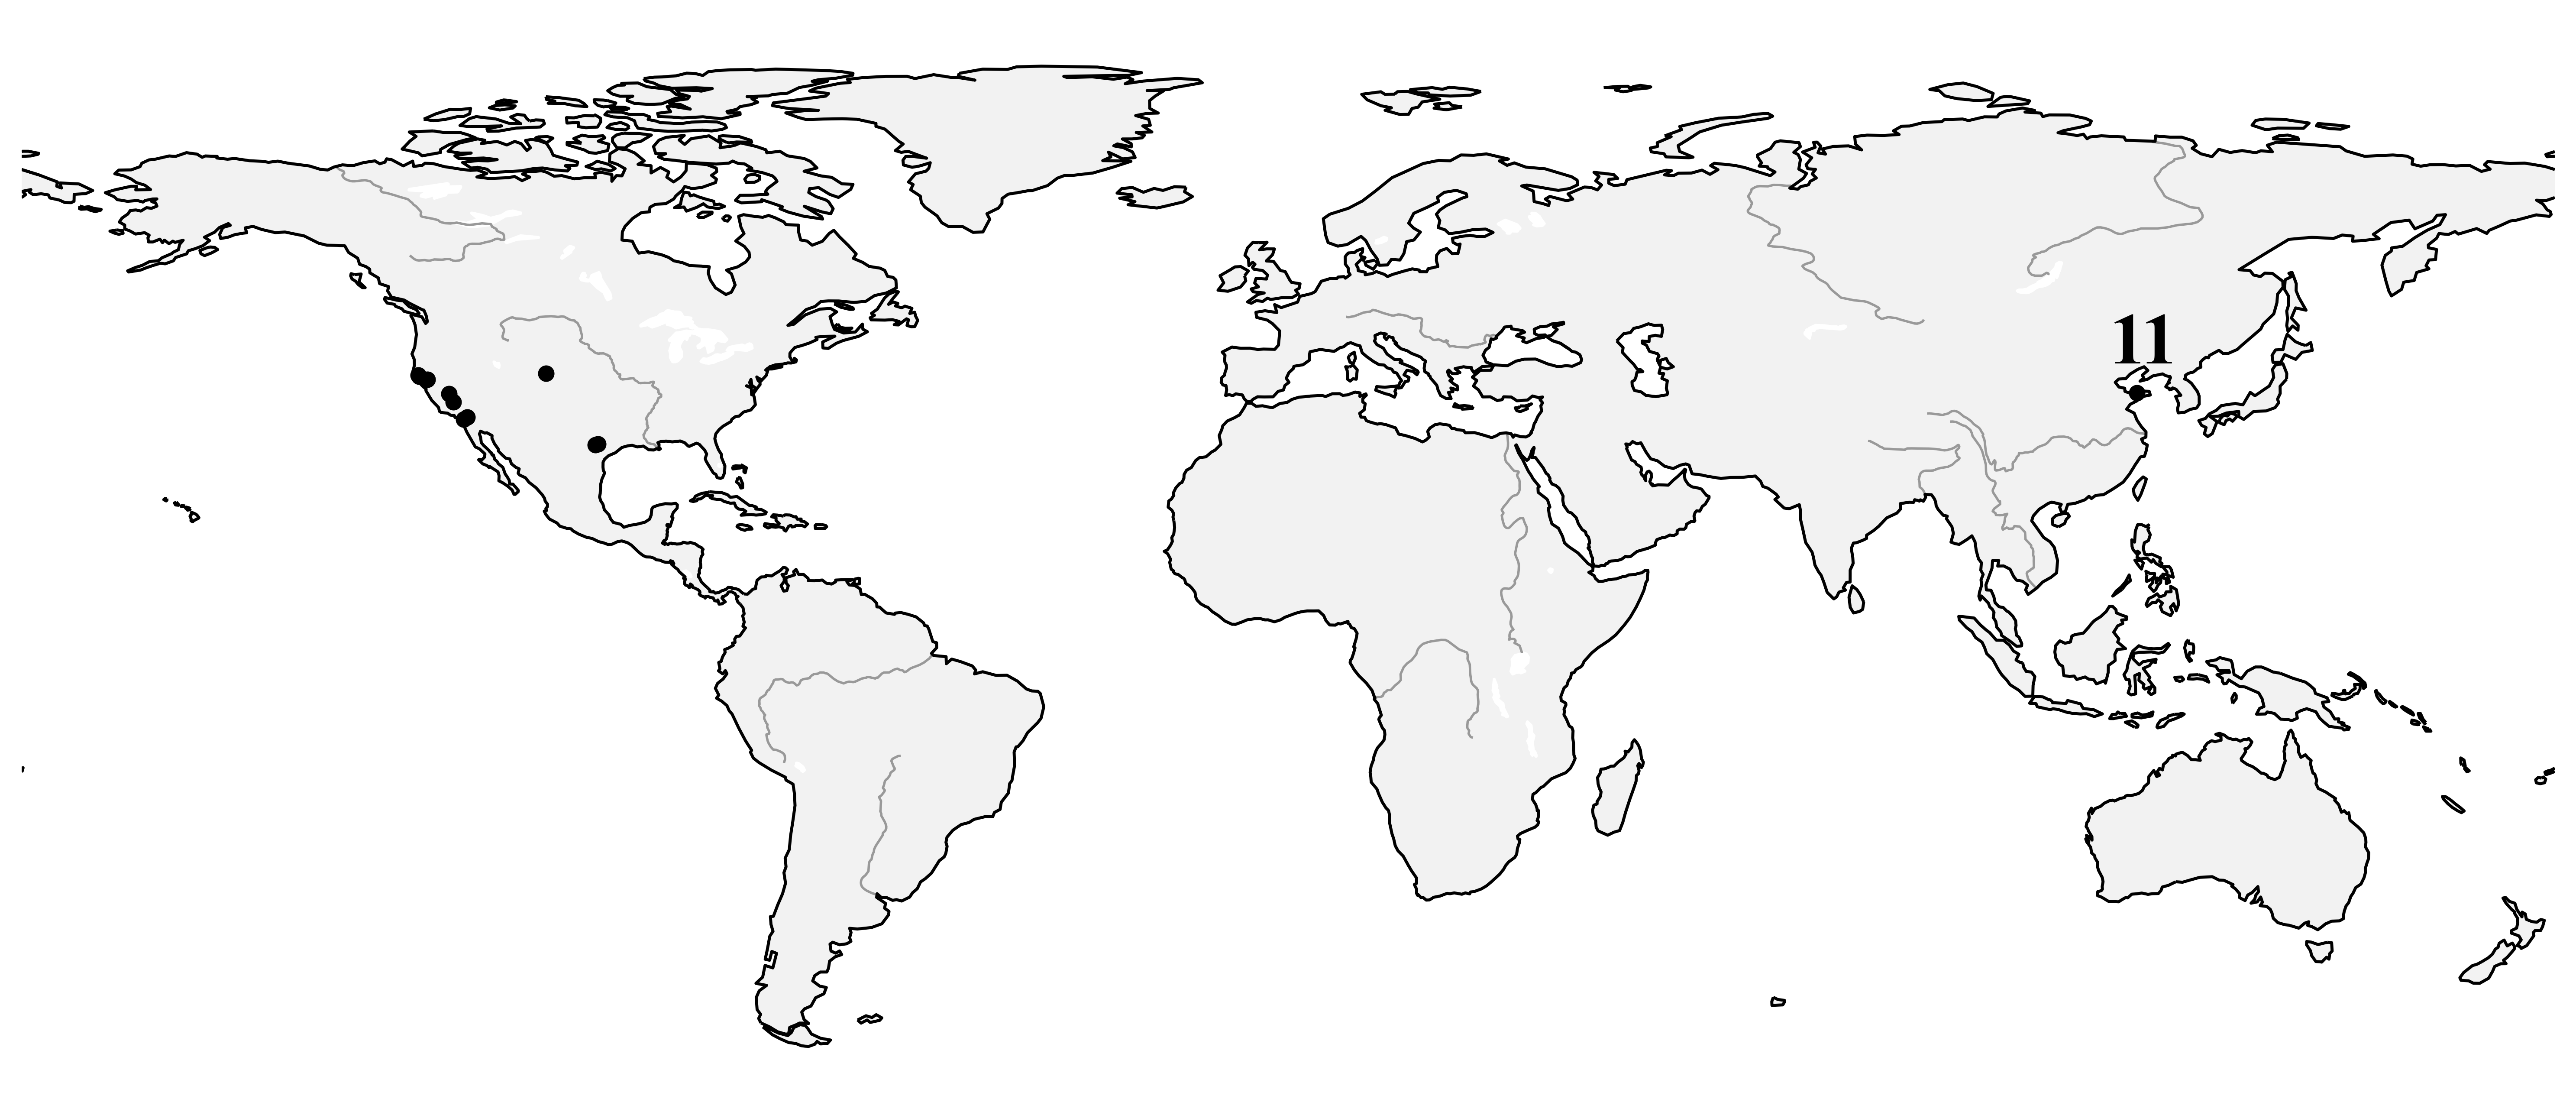

In [10]:
rgb_list = ['#606060','#8ec0cb','#00CC66','#66CC00',
                                '#69aa4c','#CCCC00','#ebc874','#99004C','#FF6666']
cmap1 = colors.ListedColormap(rgb_list)
name = ['Sbedrock', 'Sbedrock', 'Sb_field', '$S_{{bedrock}}$ (mm)']
level = np.arange(0,500,50)
cmap = cmap1
draw(name,level,cmap)